# For homework 1.b


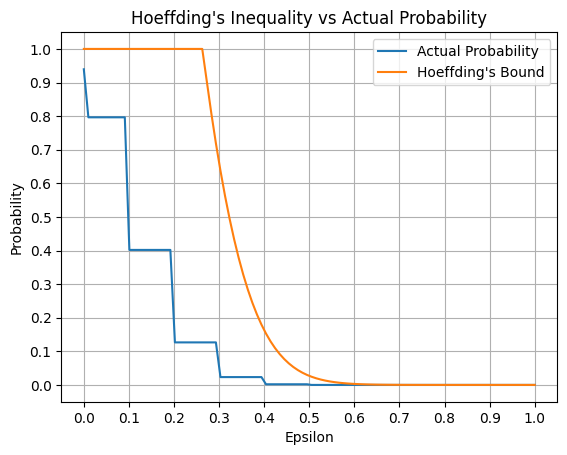

In [37]:
import numpy as np
import matplotlib.pyplot as plt
# import sys
# sys.setrecursionlimit(1000000)

def factorial(n):
    # Base case: if n is 0 or 1, the factorial is 1
    if n == 0 or n == 1:
        return 1
    # Recursive case: compute factorial using recursion
    else:
        return n * factorial(n - 1)

# Calculate the Bernoulli probability of k for n tosses and p probability
def bernoulli_pmf(n, p, k):
    # print("bernoulli_pmf: n, p, k: ", n, p, k)
    pmf = (factorial(n) / (factorial(k) * factorial(n - k))) * p ** k * (1 - p) ** (n - k)
    # print("bernoulli_pmf->pmf: ", pmf)
    return pmf

def bernoulli_cdf(left_bound, right_bound, n, p):
    cdf_p = 0.0
    for i in range(left_bound, right_bound+1, 1):
        cdf_p += bernoulli_pmf(n, p, i)
    return cdf_p

def hoeffding_bound(n, m, epsilon):
    bound = 2 * m * np.exp(-2 * n * epsilon**2)
    if bound > 1:
        bound = 1
    return bound

def actual_probability(p, n, epsilon):
    if epsilon > 0.5:
        return 0.0
    else:
        return 1 - bernoulli_cdf(int(n * p - n * epsilon), int(n * p + n * epsilon), n, p) ** 2

def plot_hoeffding_vs_actual(p, n):
    epsilons = np.linspace(0, 1, 100)
    actual_probs = [actual_probability(p, n, epsilon) for epsilon in epsilons]
    hoeffding_probs = [hoeffding_bound(n, 2, epsilon) for epsilon in epsilons]

    plt.plot(epsilons, actual_probs, label='Actual Probability')
    plt.plot(epsilons, hoeffding_probs, label="Hoeffding's Bound")
    plt.xlabel('Epsilon')
    plt.ylabel('Probability')
    plt.title("Hoeffding's Inequality vs Actual Probability")

    num_ticks = 10
    tick_positions = [i/10 for i in range(0, 11, 1)]
    tick_labels = ['{}'.format(i/10) for i in range(0, num_ticks + 1)]
    plt.xticks(tick_positions, tick_labels)
    plt.yticks(tick_positions, tick_labels)
    # Add a grid
    plt.grid(True)
    plt.legend()
    plt.show()

# Parameters
p = 0.5  # Probability of heads for each coin
n = 10   # Number of tosses

# Plotting
plot_hoeffding_vs_actual(p, n)
